In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn import datasets

In [9]:
data = pd.read_csv("Breast_cancer_data.csv")

<Figure size 640x480 with 0 Axes>

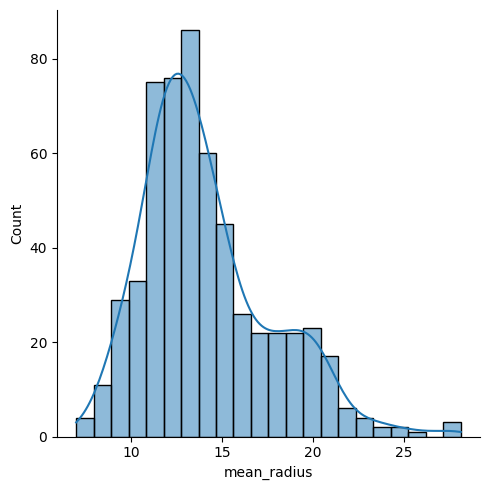

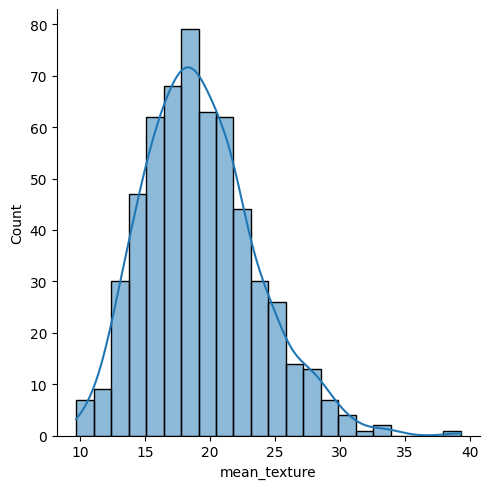

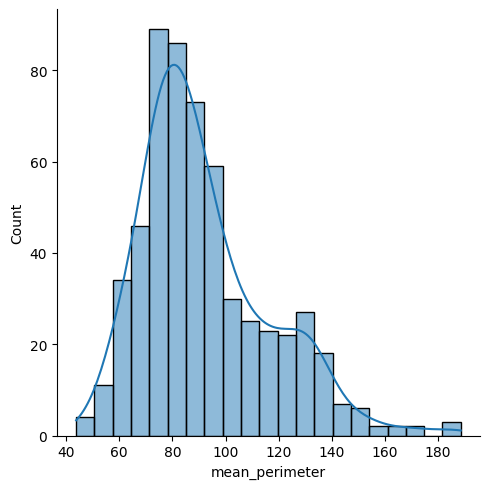

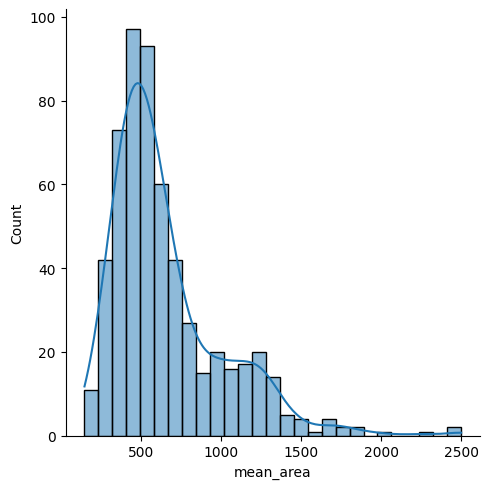

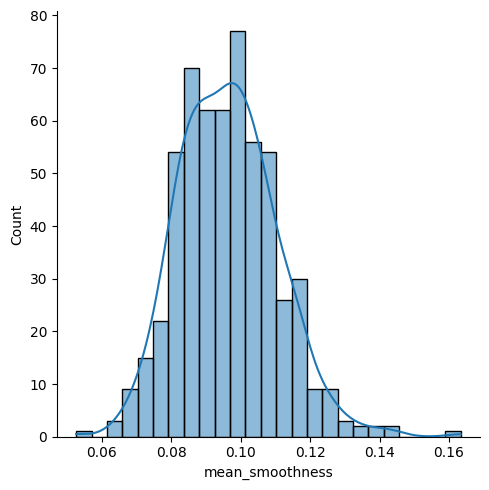

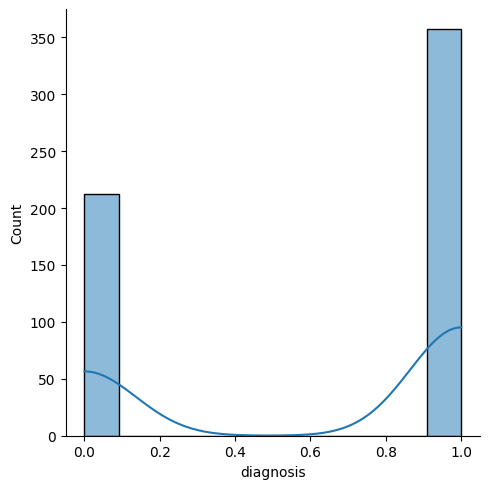

In [10]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.displot(data[col],kde=True)

In [17]:
i=0
for columns in data.columns :
    i+=1
    if i <= 5 : 
        data = data.sort_values(columns)
        Q1 , Q3 = data[columns].quantile(0.25) , data[columns].quantile(0.75)
        IQR = Q3 - Q1 
        lower , upper = Q1 - 1.5 * IQR ,  Q3 + 1.5 * IQR
        data = data[(data[columns]>lower)&(data[columns]<upper)]
    else  :
        break
data.sort_index()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0
5,12.450,15.70,82.57,477.1,0.12780,0
7,13.710,20.83,90.20,577.9,0.11890,0
8,13.000,21.82,87.50,519.8,0.12730,0
9,12.460,24.04,83.97,475.9,0.11860,0
...,...,...,...,...,...,...
557,9.423,27.88,59.26,271.3,0.08123,1
558,14.590,22.68,96.39,657.1,0.08473,1
559,11.510,23.93,74.52,403.5,0.09261,1
560,14.050,27.15,91.38,600.4,0.09929,1


In [12]:
#binarizer on last 2 features
bin_area= Binarizer(threshold=1000)
column_area= data['mean_area'].values
column_area = column_area.reshape(-1,1)
array_area = bin_area.fit_transform(column_area)
array_area = array_area.ravel()
#array_area
bin_smoothness= Binarizer(threshold=0.10)
column_smoothness= data['mean_smoothness'].values
column_smoothness= column_smoothness.reshape(-1,1)
array_smoothness = bin_smoothness.fit_transform(column_smoothness)
array_smoothness = array_smoothness.ravel()
#array_smoothness

<Axes: >

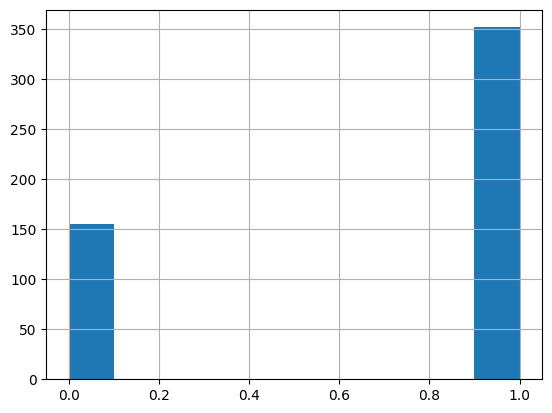

In [13]:
data["diagnosis"].hist()

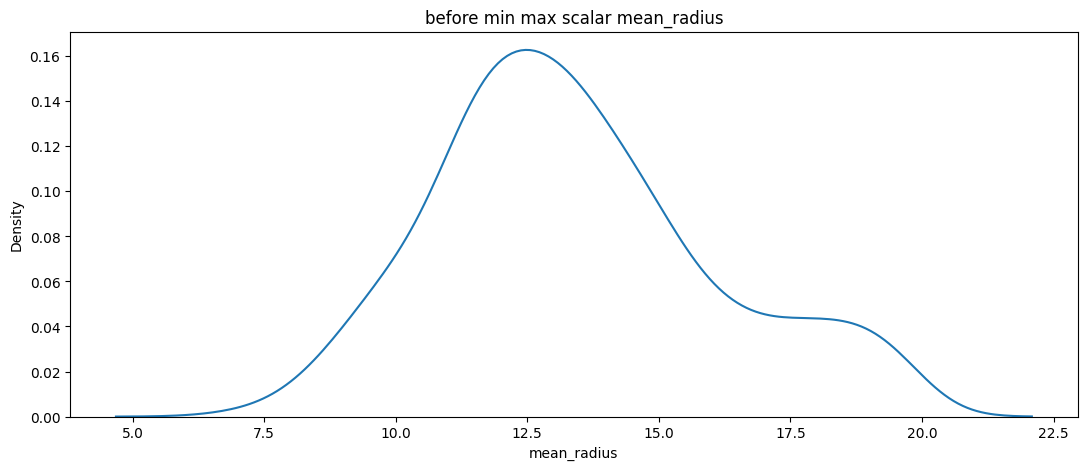

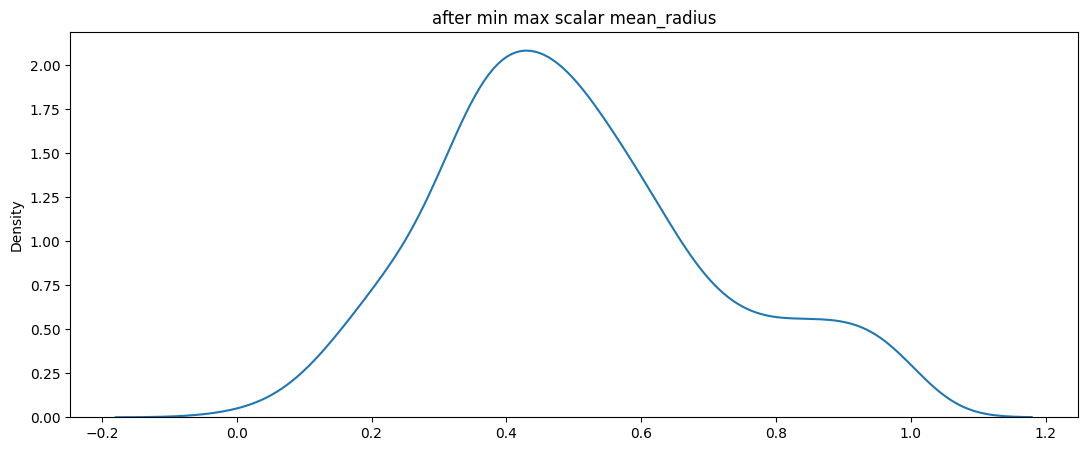

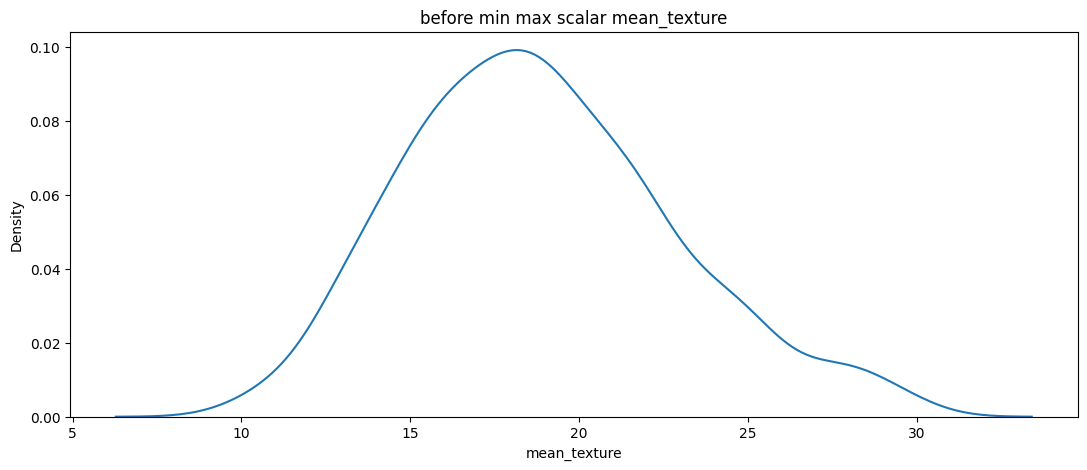

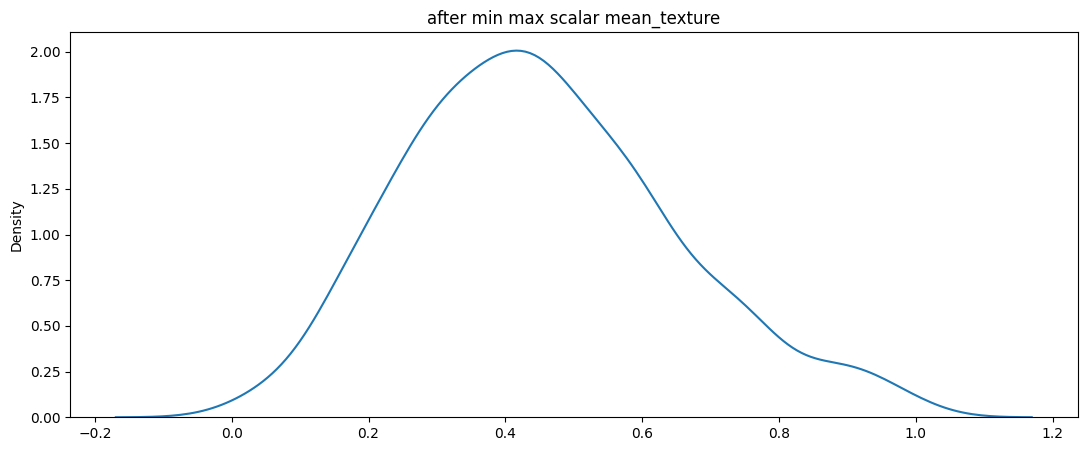

In [14]:
#minmax scalar on first 2 features 
def plots (df , var , t) :
    plt.figure(figsize=(13,5))
    sns.kdeplot(df[var])
    plt.title("before min max scalar "+var)
    plt.figure(figsize=(13,5))
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title("after min max scalar "+var)
mms = MinMaxScaler()
i = 0
for columns in data.columns :
    i +=1
    plots(data , columns , mms)
    if (i==2) :
        break